# Stock Price prediction

In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf # Pour charger les dataset depuis yahoo finance. Tu dois l'installer avant.
import sklearn
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression



In [16]:
df = yf.download('AAPL') # cette ligne  permet de charger les données historique d'apple.

[*********************100%***********************]  1 of 1 completed


In [17]:
df.shape

(10505, 6)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10505 entries, 1980-12-12 to 2022-08-11
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10505 non-null  float64
 1   High       10505 non-null  float64
 2   Low        10505 non-null  float64
 3   Close      10505 non-null  float64
 4   Adj Close  10505 non-null  float64
 5   Volume     10505 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 574.5 KB


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100040,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600


<AxesSubplot:xlabel='Date'>

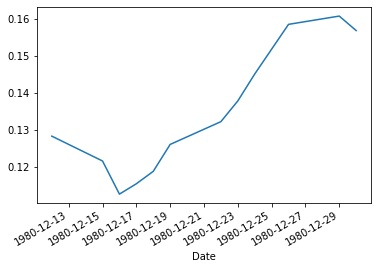

In [20]:
df.loc['1980-12-12':'1980-12-30','Close'].plot()

In [21]:
df.iloc[0:100,3]

Date
1980-12-12    0.128348
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
                ...   
1981-04-30    0.126674
1981-05-01    0.126674
1981-05-04    0.126116
1981-05-05    0.125558
1981-05-06    0.122210
Name: Close, Length: 100, dtype: float64

In [22]:

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10505.000000,10505.000000,10505.000000,10505.000000,10505.000000,1.050500e+04
mean,15.234566,15.405459,15.067159,15.243275,14.592244,3.299345e+08
std,32.856894,33.249921,32.482555,32.884548,32.566481,3.385948e+08
min,0.049665,0.049665,0.049107,0.049107,0.038276,0.000000e+00
25%,0.284598,0.290179,0.276786,0.284598,0.235990,1.230553e+08
50%,0.477679,0.486607,0.468929,0.477679,0.394307,2.175620e+08
75%,15.214286,15.338214,15.082143,15.225357,13.188687,4.094384e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,7.421641e+09


In [23]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:

df=df.dropna(axis=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100040,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600
...,...,...,...,...,...,...
2022-08-05,163.210007,165.850006,163.000000,165.350006,165.350006,56646600
2022-08-08,166.369995,167.809998,164.199997,164.869995,164.869995,60276900
2022-08-09,164.020004,165.820007,163.250000,164.919998,164.919998,63135500


In [27]:
df=df.drop(['High','Low','Adj Close','Volume','Open'], axis=1)

In [28]:
df

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-08-05,165.350006
2022-08-08,164.869995
2022-08-09,164.919998


In [29]:
df.index.min()

Timestamp('1980-12-12 00:00:00')

In [30]:
df.shape
df.tail()

,Close
Date,
2022-08-05,165.350006
2022-08-08,164.869995
2022-08-09,164.919998
2022-08-10,169.240005
2022-08-11,168.490005


In [33]:
#y=df.drop(['Open'],axis=1)
x=df.drop(['Close'],axis=1)


In [141]:
test_y=y.iloc[-500:-1]
test_x=x.iloc[-500:-1]

In [142]:
test_y.shape

(499, 1)

In [143]:
x.drop(x.index[-500:-1],axis=0,inplace=True)
y.drop(y.index[-500:-1],axis=0,inplace=True)

In [144]:
x.head()
x.shape

(9994, 1)

In [145]:
y.shape

(9994, 1)

In [146]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [147]:
model.score(test_x,test_y)

0.9851934021622573

In [150]:
prediction=model.predict(test_x)
prediction.shape

(499, 1)

In [153]:
import pickle

In [154]:

filename='prediction.sav'
pickle.dump(model,open(filename,'wb')) 


In [156]:
model1=pickle.load(open(filename,'rb'))
model1

LinearRegression()